In [27]:
%matplotlib inline

In [28]:
import sys
sys.path.append("..")
from realtime.stockdata import *

class MarketData:
    """ use dictionary to store the market data"""
    def __init__(self):
        self.__recent_ticks__ = dict()

    def add_last_price(self, time, symbol, price, high, low, volume):
        tick_data = TickData(symbol, time, price, high, low, volume)
        self.__recent_ticks__[symbol] = tick_data

    def add_open_price(self, time, symbol, price):
        tick_data = self.get_existing_tick_data(symbol, time)
        tick_data.open_price = price

    def get_existing_tick_data(self, symbol, time):
        if not symbol in self.__recent_ticks__:
            tick_data = TickData(symbol, time)  # all the default price,high,low=0
            self.__recent_ticks__[symbol] = tick_data
        return self.__recent_ticks__[symbol]

    def get_last_price(self, symbol):
        return self.__recent_ticks__[symbol].last_price

    def get_open_price(self, symbol):
        return self.__recent_ticks__[symbol].open_price

    def get_high_price(self, symbol):
        return self.__recent_ticks__[symbol].high_price

    def get_low_price(self, symbol):
        return self.__recent_ticks__[symbol].low_price

    def get_timestamp(self, symbol):
        return self.__recent_ticks__[symbol].timestamp


class TickData:
    """ Store a single tick unit of data """
    def __init__(self, symbol, timestamp, last_price=0, high=0,
           low=0, total_volume=0):
        self.symbol = symbol
        self.timestamp = timestamp
        self.open_price = 0
        self.high_price = high
        self.low_price = low
        self.last_price = last_price
        self.total_volume = total_volume


class MarketDataSource:
    def __init__(self, symbol,start,end):
        self.event_tick = None
        self.ticker = symbol
        self.start, self.end = start, end
        self.md = MarketData()
        self.bars = None  # add Datum
        self.fullname = "..//datum//" + self.ticker + ".lc1"
        print "full file name ===> ", self.fullname
        mindata = minuteOfStock(self.fullname)
        self.bars = mindata.dataframe.loc[start:end]
        
    def start_market_simulation(self):
        # minbars = mindata.dataframe[self.start : self.end]
        # minbars = mindata.dataframe
        #_dt_range = mindata.getDatetimeRange()
        # self.start, self.end = _dt_range[0].date(), _dt_range[1].date()
        for time, row in self.bars.iterrows():
            # print  "TIME is %s, and row ==> %s" %(time,row)
            self.md.add_last_price(time, self.ticker, row["close"], row["high"],
                    row["low"], row["volume"])
            self.md.add_open_price(time, self.ticker, row["open"])
            if not self.event_tick is None:
                self.event_tick(self.md)



In [33]:
import datetime as dt
symbol = "sz002594"
fullname = "..//datum//" + symbol + ".lc1"
start = dt.datetime(2014,7,18)
end = dt.datetime(2014,7,30)
# mds = MarketDataSource(symbol, start,end)    # both are OK
mds = MarketDataSource(symbol, "2014-7-18","2014-7-21")  # Good ,simple


full file name ===>  ..//datum//sz002594.lc1


In [56]:
mds.bars.loc["2014-7-18"]

,open,high,low,close,volume
datetime,,,,,
2014-07-18 09:31:00,46.520000,46.599998,46.520000,46.580002,46200
2014-07-18 09:32:00,46.599998,46.599998,46.580002,46.580002,28900
2014-07-18 09:33:00,46.500000,46.599998,46.500000,46.580002,28800
2014-07-18 09:34:00,46.599998,46.700001,46.599998,46.700001,14000
2014-07-18 09:35:00,46.730000,46.820000,46.730000,46.820000,2000
2014-07-18 09:36:00,46.889999,46.910000,46.889999,46.900002,38800
2014-07-18 09:37:00,46.599998,46.889999,46.599998,46.700001,14600
2014-07-18 09:38:00,46.700001,46.849998,46.700001,46.720001,4800
2014-07-18 09:39:00,46.720001,46.849998,46.720001,46.849998,13100


In [65]:
mds.bars['close'].loc["2014-7-18 14:59:00"]

46.369999

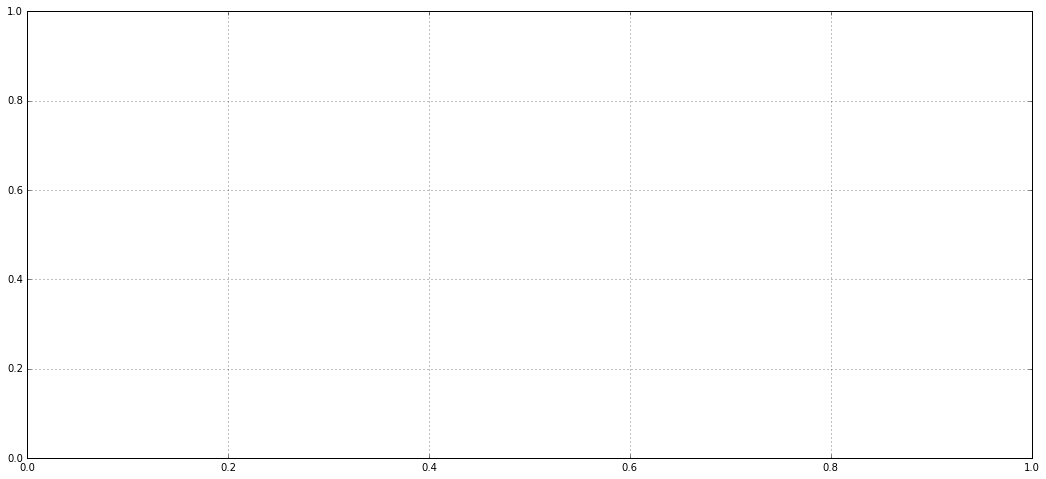

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,8))
#mds.bars['close'].plot()
#plt.plot(mds.bars['close'])
plt.plot?
plt.grid(True)
plt.legend(loc="best")

In [ ]:
mds.bars['close'].plot

In [ ]:
mds.bars['close'].plot

In [41]:
class Order:
    """Order Class order type market order , done by the next tick
    limited Order , completed when limited price is met"""
    def __init__(self, timestamp, symbol, qty, is_buy,
        is_market_order, price=0):
        self.timestamp = timestamp
        self.symbol = symbol
        self.qty = qty
        self.price = price
        self.is_buy = is_buy
        self.is_market_order = is_market_order
        self.is_filled = False
        self.filled_price = 0
        self.filled_time = None
        self.filled_qty = 0


class Position:
    def __init__(self):
        self.symbol = None
        self.buys, self.sells, self.net = 0, 0, 0
        self.realized_pnl = 0
        self.unrealized_pnl = 0
        self.position_value = 0

    def event_fill(self, timestamp, is_buy, qty, price):
        if is_buy:
            self.buys += qty
        else:
            self.sells += qty
        self.net = self.buys - self.sells
        changed_value = qty * price * (-1 if is_buy else 1)
        self.position_value += changed_value
        if self.net == 0:
            self.realized_pnl = self.position_value

    def update_unrealized_pnl(self, price):
        if self.net == 0:
            self.unrealized_pnl = 0
        else:
            self.unrealized_pnl = price * self.net + \
                                    self.position_value
        return self.unrealized_pnl

In [43]:
class Strategy:
    """ Base strategy for implementation """
    def __init__(self):
        self.event_sendorder = None

    def event_tick(self, market_data):
        pass

    def event_order(self, order):
        pass

    def event_position(self, positions):
        pass

    def send_market_order(self, symbol, qty, is_buy, timestamp):
        if not self.event_sendorder is None:
            order = Order(timestamp, symbol, qty, is_buy, True)
            self.event_sendorder(order)
    def send_limit_order(self, symbol, qty, is_buy, timestamp):
        if not self.event_sendorder is None:
            order = Order(timestamp, symbol, qty, is_buy, True)
            self.event_sendorder(order)


In [44]:
class IntraDayTrendStrategy(Strategy):
    """ if previous 30minutes show a trend slope ,then signaling """
    pass
class TimeStatStrategy(Strategy):
    """ if the certain time frame reach the high or low,
    trigger the trading signal"""
    pass

In [ ]:
import pandas as pd

class MeanRevertingStrategy(Strategy):
    """ Implementation of a mean-reverting strategy
    based on the Strategy class """
    def __init__(self, symbol,
                lookback_intervals=20,
                buy_threshold=-1.5,
                sell_threshold=1.5):
        Strategy.__init__(self)
        self.symbol = symbol
        self.lookback_intervals = lookback_intervals
        self.buy_threshold = buy_threshold
        self.sell_threshold = sell_threshold
        self.prices = pd.DataFrame()
        self.is_long, self.is_short, self.is_empty= False, False, True
        self.order = None
        self.gap = 0

    def event_position(self, positions):
        if self.symbol in positions:
            position = positions[self.symbol]
            self.is_empty = True if position.net == 0 else False
            self.is_long = True if position.net > 0 else False
            self.is_short = True if position.net < 0 else False


    def event_order(self,order):
        if not self.is_empty:
            self.order = order

    def bounce_profit(self, price):
        """if the gap profit is met
        i.e 0.20 * 600 = 120  """
        gap = self.order.filled_price - price
        # print "Error, no order!!"
        return gap

    def event_tick(self, market_data):
        self.store_prices(market_data)
        if len(self.prices) < self.lookback_intervals:
            return
        _price = market_data.get_last_price(self.symbol)
        if not self.is_empty :
            self.gap = self.bounce_profit(_price)
        signal_value = self.calculate_z_score()
        timestamp = market_data.get_timestamp(self.symbol)
        if signal_value < self.buy_threshold:
            self.on_buy_signal(timestamp)
        elif signal_value > self.sell_threshold:
            self.on_sell_signal(timestamp)

    def store_prices(self, market_data):
        timestamp = market_data.get_timestamp(self.symbol)
        self.prices.loc[timestamp, "close"] = \
                market_data.get_last_price(self.symbol)
        self.prices.loc[timestamp, "open"] = \
                market_data.get_open_price(self.symbol)

    def calculate_z_score(self):
        self.prices = self.prices[-self.lookback_intervals:]
        returns = self.prices["close"].pct_change().dropna()
        z_score = ((returns-returns.mean())/returns.std())[-1]
        dtlast = self.prices.index[-1]
        last_price = self.prices["open"][-1]
        print "%s: price ==> %s, Zscore ==> %s"%(dtlast, last_price,z_score)
        return z_score

    def on_buy_signal(self, timestamp):
        if not self.is_long:
            if self.is_empty or self.gap > 0.20:
                self.send_market_order(self.symbol, 600, True, timestamp)
    def on_sell_signal(self, timestamp):
        if not self.is_short:
            if self.is_empty or self.gap <- 0.20:
                self.send_market_order(self.symbol, 600, False, timestamp)

In [ ]:
class BounceStrategy(MeanRevertingStrategy):
    """ pairing the buy sell order ,if profit over 100 yuan in either
    direction, trigger the trading signal"""
    def __init__(self, symbol):
        MeanRevertingStrategy.__init__(self,symbol,20,-2,2)
        self.prices = pd.DataFrame()
        self.is_long, self.is_short = False, False

    def event_tick(self, market_data):
        self.store_prices(market_data)
        if len(self.prices) < self.lookback_intervals:
            return
        signal_value = self.calculate_z_score()
        timestamp = market_data.get_timestamp(self.symbol)
        if signal_value < self.buy_threshold:
            self.on_buy_signal(timestamp)
        elif signal_value > self.sell_threshold:
            self.on_sell_signal(timestamp)

    def event_order(self,order):
        pass

    def event_position(self, positions):
        if self.symbol in positions:
            position = positions[self.symbol]
            self.is_long = True if position.net > 0 else False
            self.is_short = True if position.net < 0 else False

    def on_buy_signal(self, timestamp):
        if not self.is_long:
            self.send_market_order(self.symbol, 600, True, timestamp)
    def on_sell_signal(self, timestamp):
        if not self.is_short:
            self.send_market_order(self.symbol, 600, False, timestamp)



In [ ]:
import datetime as dt
import pandas as pd
class Backtester:
    def __init__(self, symbol):
        self.target_symbol = symbol
        self.strategy = None
        self.unfilled_orders = []
        self.positions = dict()
        self.current_prices = None
        self.rpnl, self.upnl = pd.DataFrame(), pd.DataFrame()

    def get_timestamp(self):
        return self.current_prices.get_timestamp(
            self.target_symbol)

    def get_trade_date(self):
        timestamp = self.get_timestamp()
        # return timestamp.strftime("%Y-%m-%d")
        return timestamp.strftime("%Y-%m-%d %H:%M:%S")

    def update_filled_position(self, symbol, qty, is_buy,
                                price, timestamp):
        position = self.get_position(symbol)
        position.event_fill(timestamp, is_buy, qty, price)
        self.strategy.event_position(self.positions)
        self.rpnl.loc[timestamp, "rpnl"] = position.realized_pnl
        print self.get_trade_date(), \
                "Filled:", "BUY" if is_buy else "SELL", \
                qty, symbol, "@", price,\
                "\nrealized_pnl:===>", position.realized_pnl


    def get_position(self, symbol):
        if symbol not in self.positions:
            position = Position()
            position.symbol = symbol
            self.positions[symbol] = position
        return self.positions[symbol]

    def evthandler_order(self, order):
        self.unfilled_orders.append(order)
        print self.get_trade_date(), \
            "Received order:", \
            "BUY" if order.is_buy else "SELL", order.qty, \
            order.symbol

    def match_order_book(self, prices):
        if len(self.unfilled_orders) > 0:
            self.unfilled_orders = \
                [order for order in self.unfilled_orders
                    if self.is_order_unmatched(order, prices)]

    def is_order_unmatched(self, order, prices):
        symbol = order.symbol
        timestamp = prices.get_timestamp(symbol)
        if order.is_market_order and timestamp > order.timestamp:
            # Order is matched and filled.
            order.is_filled = True
            open_price = prices.get_open_price(symbol)
            order.filled_timestamp = timestamp
            order.filled_price = open_price
            self.update_filled_position(symbol,
                    order.qty,
                    order.is_buy,
                    open_price,
                    timestamp)
            self.strategy.event_order(order)
            return False
        return True

    def print_position_status(self, symbol, prices):
        if symbol in self.positions:
            position = self.positions[symbol]
            close_price = prices.get_last_price(symbol)
            position.update_unrealized_pnl(close_price)
            self.upnl.loc[self.get_timestamp(), "upnl"] = \
                        position.unrealized_pnl
            print self.get_trade_date(), \
                    "Net:", position.net, \
                    "Value:", position.position_value, \
                    "UPnL:", position.unrealized_pnl, \
                    "RPnL:", position.realized_pnl

    def evthandler_tick(self, prices):
        self.current_prices = prices
        self.strategy.event_tick(prices)
        self.match_order_book(prices)
        self.print_position_status(self.target_symbol, prices)

    def start_backtest(self):
        self.strategy = MeanRevertingStrategy(self.target_symbol)
        self.strategy.event_sendorder = self.evthandler_order
        mds = MarketDataSource(self.target_symbol)
        mds.event_tick = self.evthandler_tick
        mds.ticker = self.target_symbol
        # mds.source = self.data_source
        # mds.start, md.end = self.start_dt, self.end_dt
        print "Backtesting started..."
        mds.start_market_simulation()
        print "Completed."


In [ ]:
if __name__ == '__main__':
    # backtester = Backtester("AAPL", dt.datetime(2014, 1, 1), dt.datetime(2014, 12, 31))
    # backtester = Backtester("MFST", dt.datetime(2014, 1, 1), dt.datetime(2014, 12, 31))
    symbol = "sz002594"
    fullname = "..//datum//" + symbol + ".lc1"
    backtester = Backtester(symbol)
    backtester.start_backtest()